# ***Importing necessery libraries***

In [2]:

import numpy as np
import pandas as pd
!pip install pydotplus
%matplotlib inline
from sklearn import tree
from sklearn import metrics,model_selection,preprocessing
from IPython.display import Image,display
import matplotlib.pyplot as plt,pydotplus


TimeoutError: Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\PRAVANJAN\.matplotlib\fontlist-v330.json.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.

## **# Mounting drive, importing csv file, reading it and showing first five rows**

In [15]:
from google.colab import drive
drive.mount('/content/drive/')
data=pd.read_csv("/content/drive/My Drive/11.csv")
data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,x_Mean,x_Std_Deviation,x_Min,x_Max,x_Range,x_RMS,x_Kurtosis,x_Crest_Factor,x_Skewness,x_Form_Factor,fault_Class
0,0.907146,0.789880,-0.240575,2.167031,2.407606,1.202587,-1.530253,1.801975,-0.010758,1.325681,C1
1,0.887116,0.789436,-0.249453,2.174922,2.424375,1.187256,-1.537753,1.831890,0.027960,1.338332,C1
2,0.898182,0.787696,-0.248138,2.193665,2.441803,1.194400,-1.540366,1.836626,0.009570,1.329796,C1
3,0.887354,0.784785,-0.271484,2.122311,2.393795,1.184350,-1.544261,1.791963,-0.008026,1.334698,C1
4,0.883708,0.784327,-0.296474,2.269293,2.565767,1.181316,-1.520042,1.920987,0.040254,1.336772,C1


# **Getting information from data**

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9140 entries, 0 to 9139
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x_Mean           9140 non-null   float64
 1   x_Std_Deviation  9140 non-null   float64
 2   x_Min            9140 non-null   float64
 3   x_Max            9140 non-null   float64
 4   x_Range          9140 non-null   float64
 5   x_RMS            9140 non-null   float64
 6   x_Kurtosis       9140 non-null   float64
 7   x_Crest_Factor   9140 non-null   float64
 8   x_Skewness       9140 non-null   float64
 9   x_Form_Factor    9140 non-null   float64
 10  fault_Class      9140 non-null   object 
dtypes: float64(10), object(1)
memory usage: 785.6+ KB


# ***Geting features as X and classes as Y , training and testing data (20% of all data) splitting ***

In [17]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)

# **Showing the classes**

In [18]:
np.unique(Y)

array(['C1', 'C2', 'C3', 'C4', 'C5'], dtype=object)

# **Training of tree and calculating training time**

In [19]:
model_tree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
import time
start = time.time()
model_tree.fit(X_train,Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.06990599632263184s


# **Prediction of testing data**

In [20]:
Y_pred=model_tree.predict(X_test)

In [21]:

print(Y_pred)
Y_test

['C5' 'C1' 'C3' ... 'C3' 'C5' 'C3']


array([['C5'],
       ['C1'],
       ['C3'],
       ...,
       ['C3'],
       ['C5'],
       ['C3']], dtype=object)

## **calculating testing accuracy **

In [22]:

accuracy=metrics.accuracy_score(Y_test,Y_pred)
print("Accuracy of this model = {:.3f}".format(accuracy))

Accuracy of this model = 0.988


# **Printing the decision tree**

In [23]:
import os
import collections
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'
import graphviz
ddata=tree.export_graphviz(model_tree,out_file=None,filled=True,rounded=True,
                          feature_names=['x_Mean','x_Std_Deviation','x_Min','x_Max','x_Range','x_RMS','x_Kurtosis','x_Crest_Factor','x_Skewness','x_Form_Factor'],
                          class_names=['C1','C2','C3','C4','C5','C6'])
graph = graphviz.Source(ddata)


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


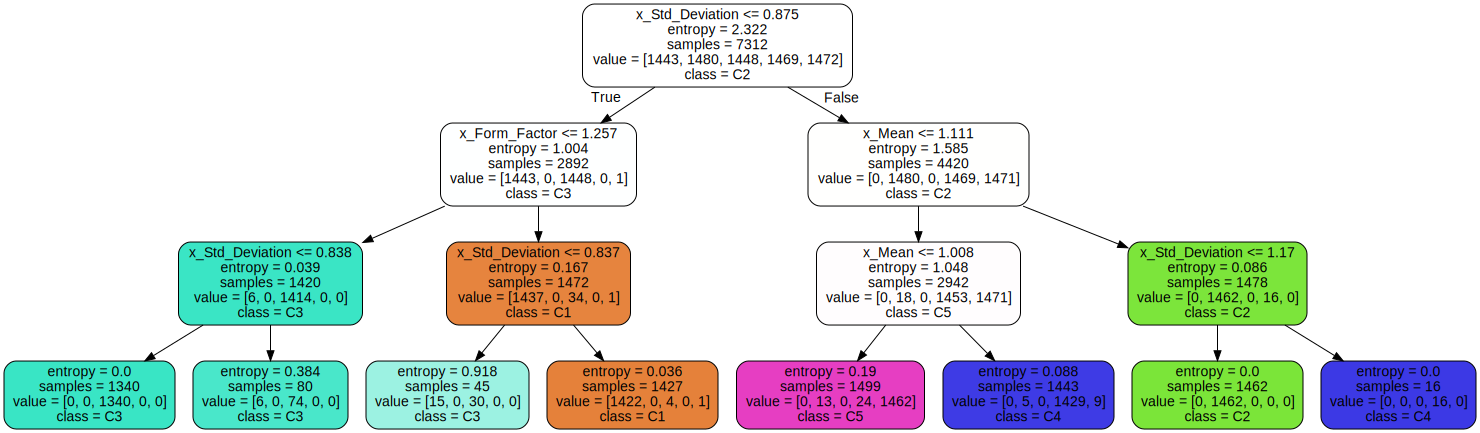

In [25]:
graph

# **Priniting the confusion matrix**

Text(0.5, 1.0, 'Confusion Matrix')

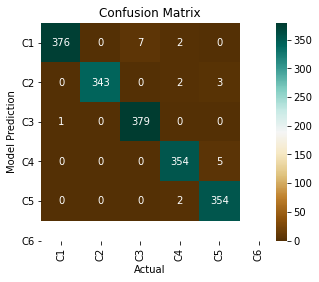

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Y_test,Y_pred)

axes = sns.heatmap(mat,square=True, annot=True,fmt='d',
                   cbar=True, cmap=plt.cm.BrBG)

class_labels = ['C1','C2','C3','C4','C5','C6' ]

axes.set_xlabel('Actual')
axes.set_ylabel('Model Prediction')

tick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(class_labels,rotation=90)

axes.set_yticks(tick_marks)
axes.set_yticklabels(class_labels,rotation=0)

axes.set_title('Confusion Matrix')